In [154]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

%matplotlib inline

In [302]:
def get_ticker_history(ticker, period='3y'):
    t = yf.Ticker(ticker)
    return t.history(period=period)

def get_crypto_and_stock(crypto_ticker, stock_ticker, crypto_per_share, period='3y'):
    crypto = get_ticker_history(crypto_ticker, period=period)
    stock = get_ticker_history(stock_ticker, period=period)    

    df = pd.DataFrame({'Value': crypto['Close'] * crypto_per_share})
    df1 = pd.DataFrame({'Percent': (stock['Close'] - df['Value']) / stock['Close']})
    df2 = stock.join([df, df1]).dropna()

    return (crypto[crypto.index >= df2.index[0]], df2)

def buy_at_25(df, cost=10000):
    buy_point = df['Percent'].describe()['25%']
    cur_price = df.iloc[-1]['Close']
    shares = cost / df[df['Percent'] <= buy_point]['Close']
    values = cur_price * shares
    
    df1 = pd.DataFrame({'Shares': shares, 'Values': values, 'Percent': (values - cost) / cost})
    return df1

def draw_candlestick(df, title):
    mpf.plot(df, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(18, 8), title=title)

def draw_premium(df):
    df['Value'].plot(label='Crypto Value', figsize=(18,8))
    df['Close'].plot(label='Stock Value')
    plt.legend()
    plt.show()

def draw_premium_percentage(df):
    plt.ylim([-0.25,1.0])
    df['Percent'].plot.area(figsize=(18,8))
    plt.title('Premium percentage')
    plt.show()

def draw_premium_with_percentage(df, kind='area'):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan=5, colspan=1)
    ax1.get_xaxis().set_visible(False)    
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan=3, colspan=1, sharex=ax1)
    df['Value'].plot(ax=ax1, label='Crypto Close')
    df['Close'].plot(ax=ax1, label='Stock Close')
    df['Percent'].plot(ax=ax2, kind=kind)
    ax1.legend()

In [254]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', 0.00095059, period='5y')

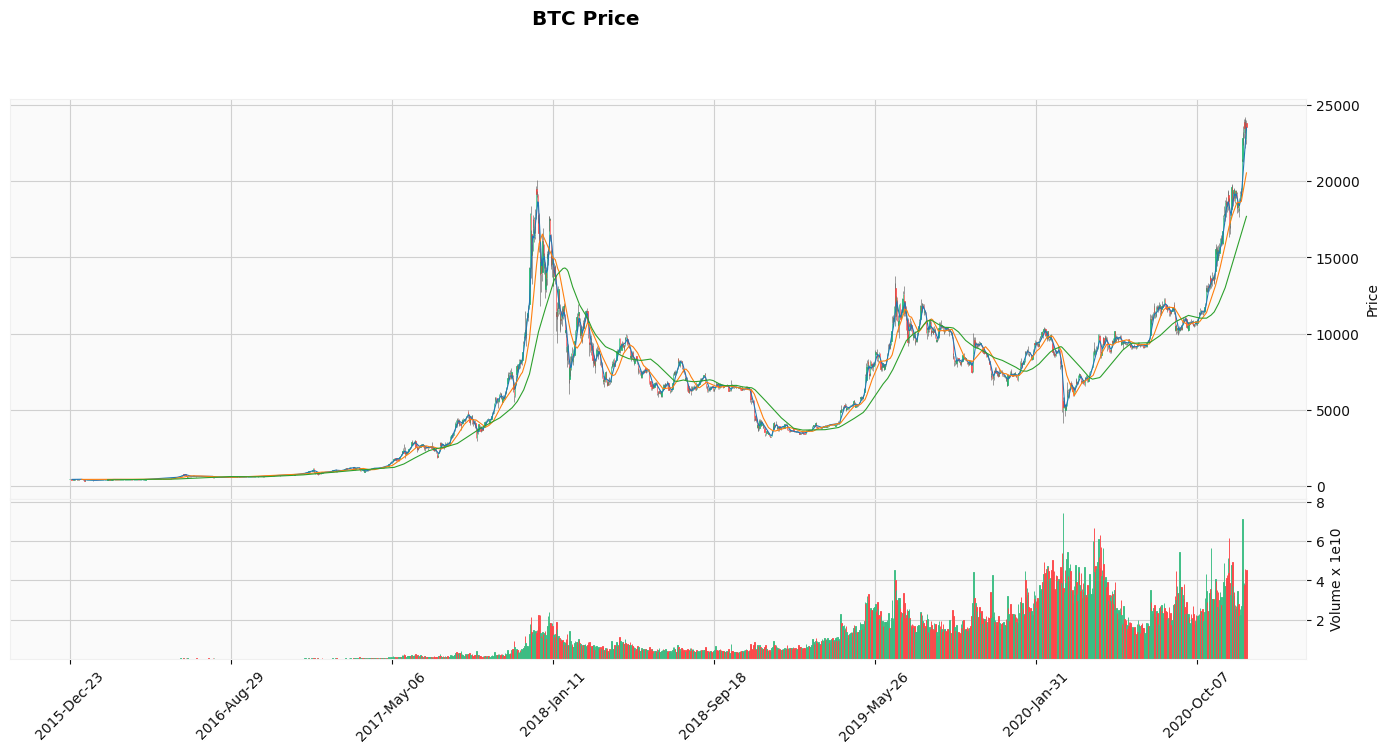

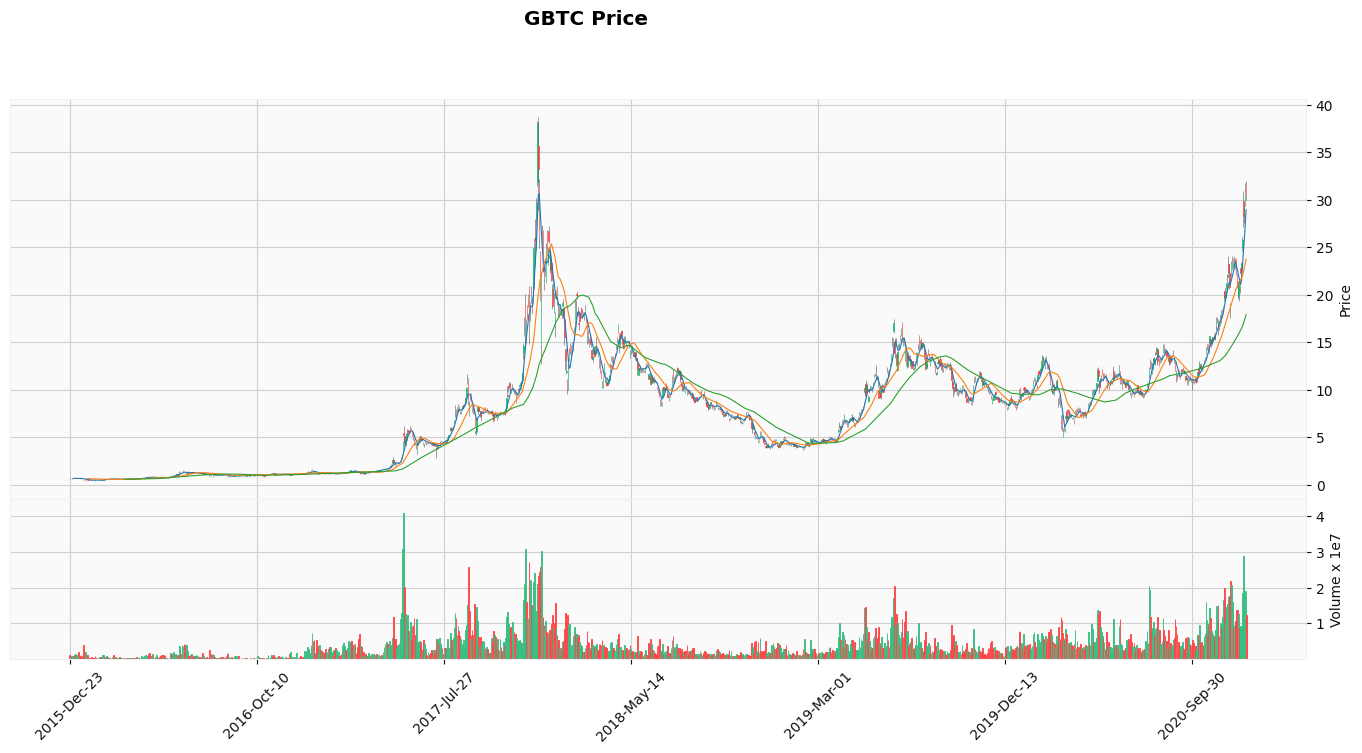

In [255]:
%matplotlib inline
draw_candlestick(btc, 'BTC Price')
draw_candlestick(gbtc, 'GBTC Price')

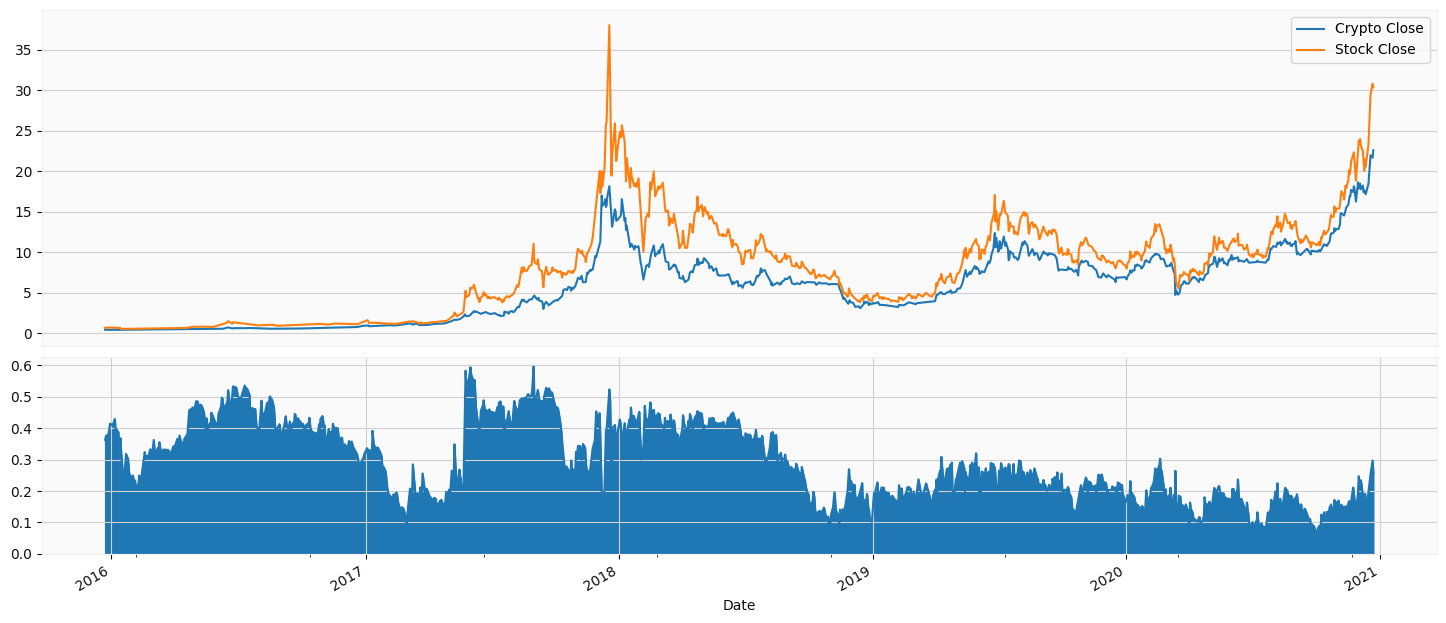

In [243]:
draw_premium_with_percentage(gbtc)

In [198]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', 0.01030231, period='3y')

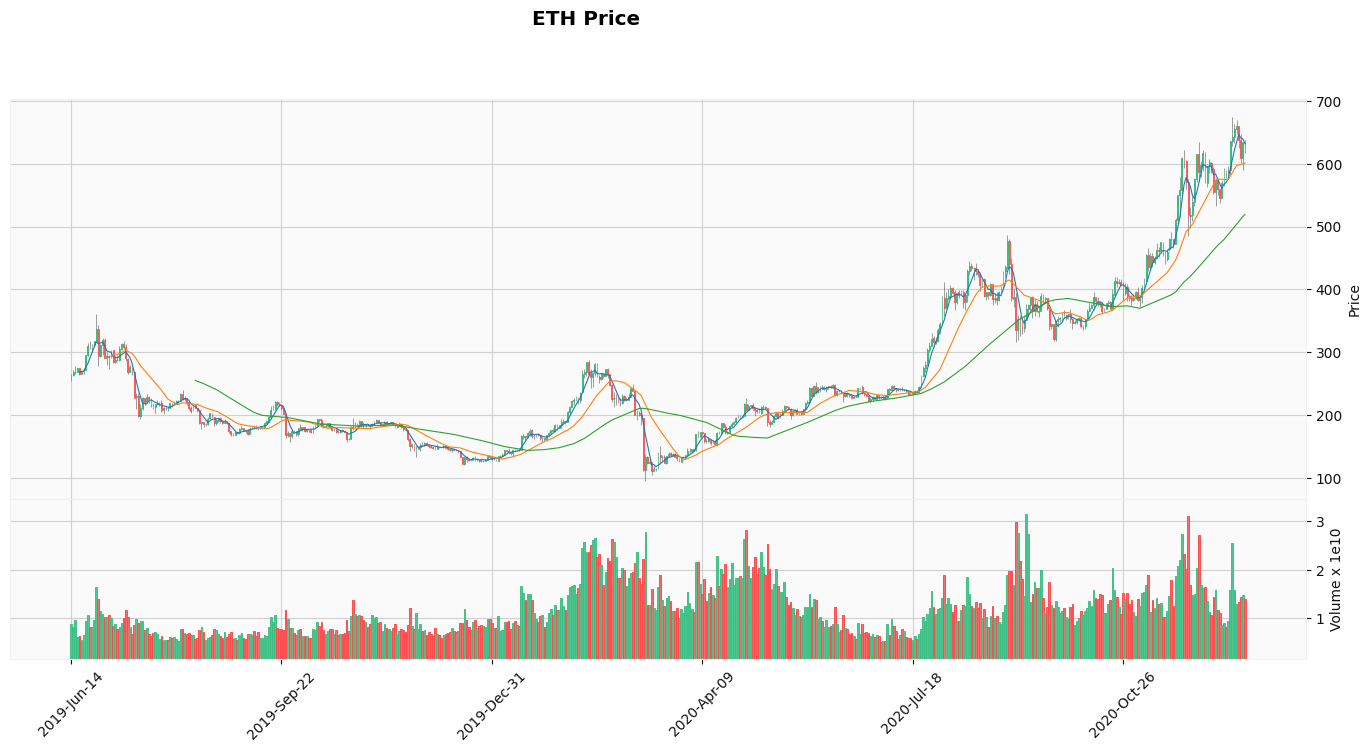

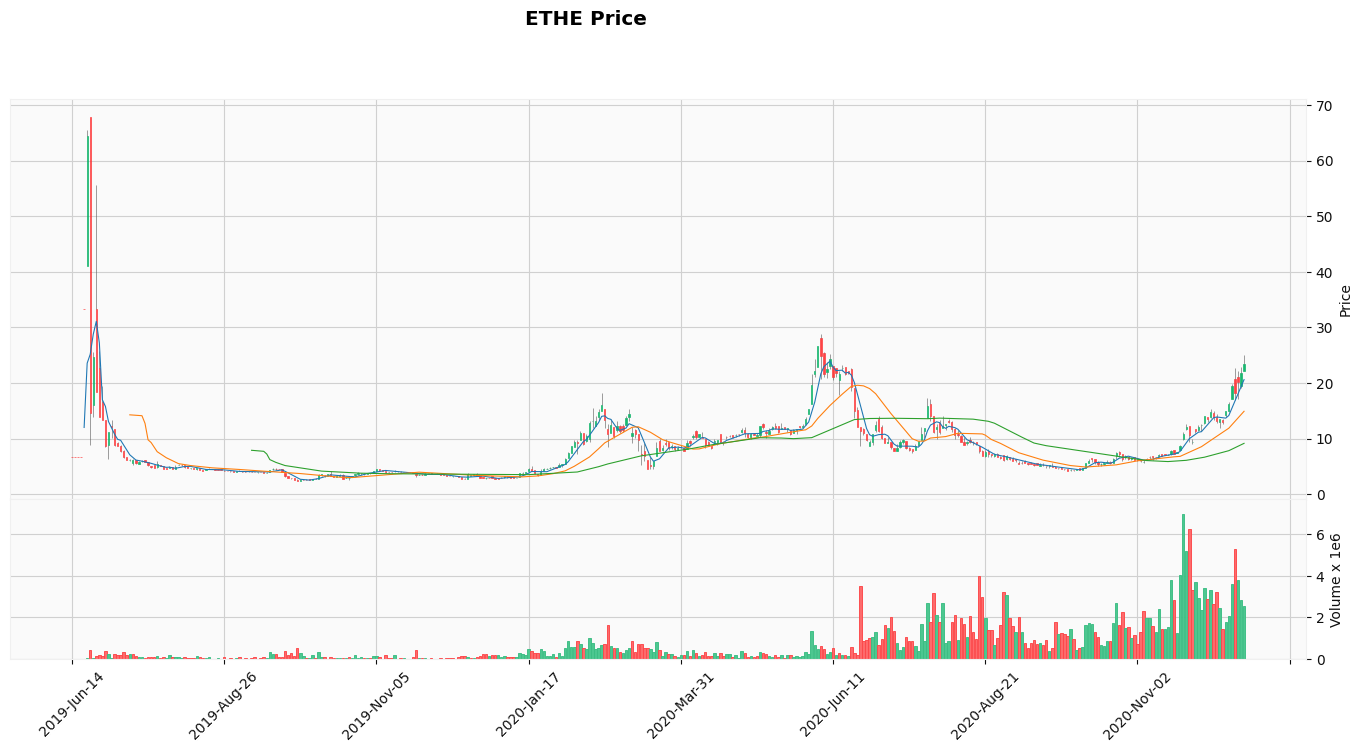

In [199]:
%matplotlib inline
draw_candlestick(eth, 'ETH Price')
draw_candlestick(ethe, 'ETHE Price')

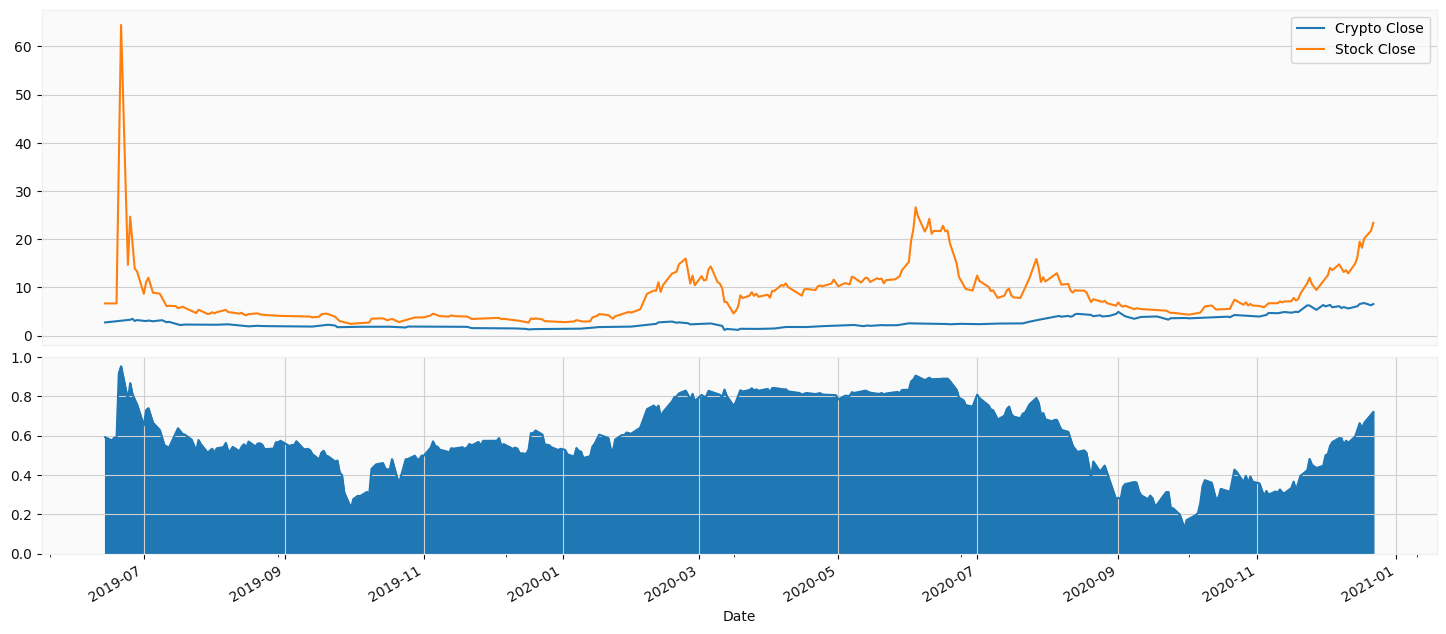

In [244]:
draw_premium_with_percentage(ethe)

In [200]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', 0.00932072, period='3y')

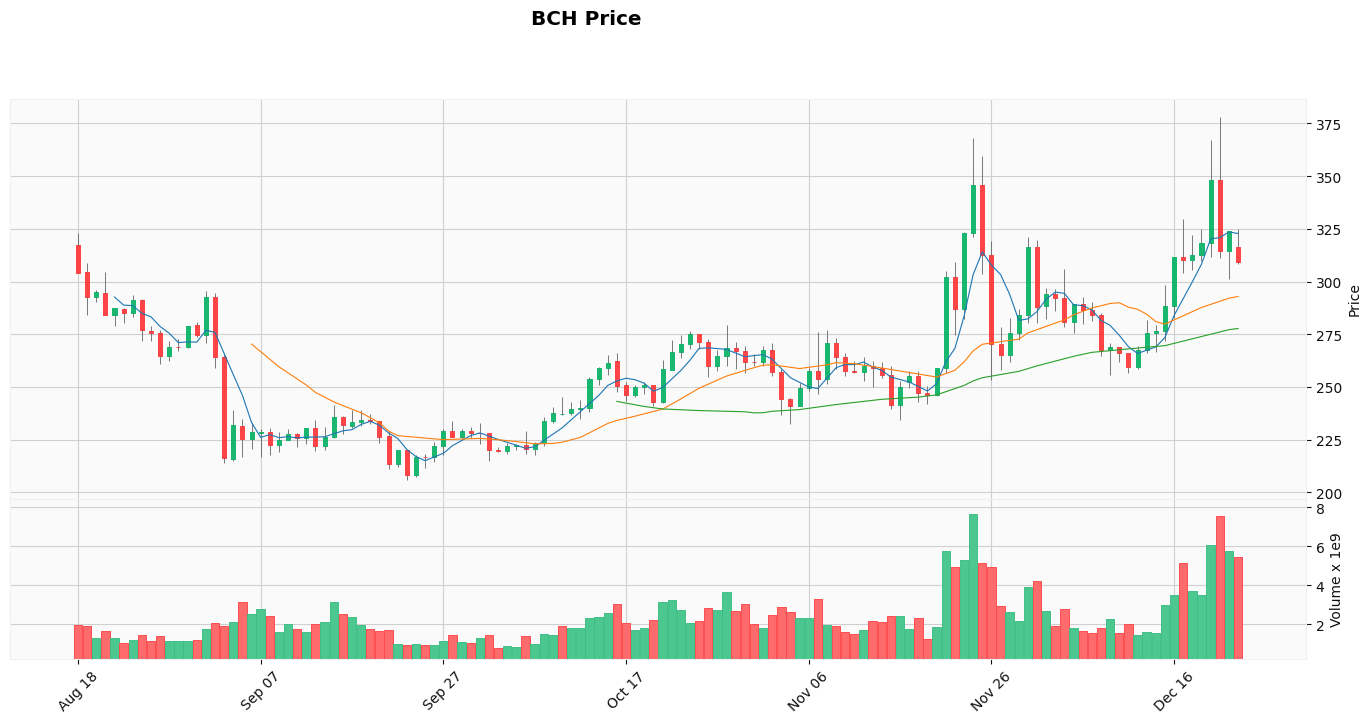

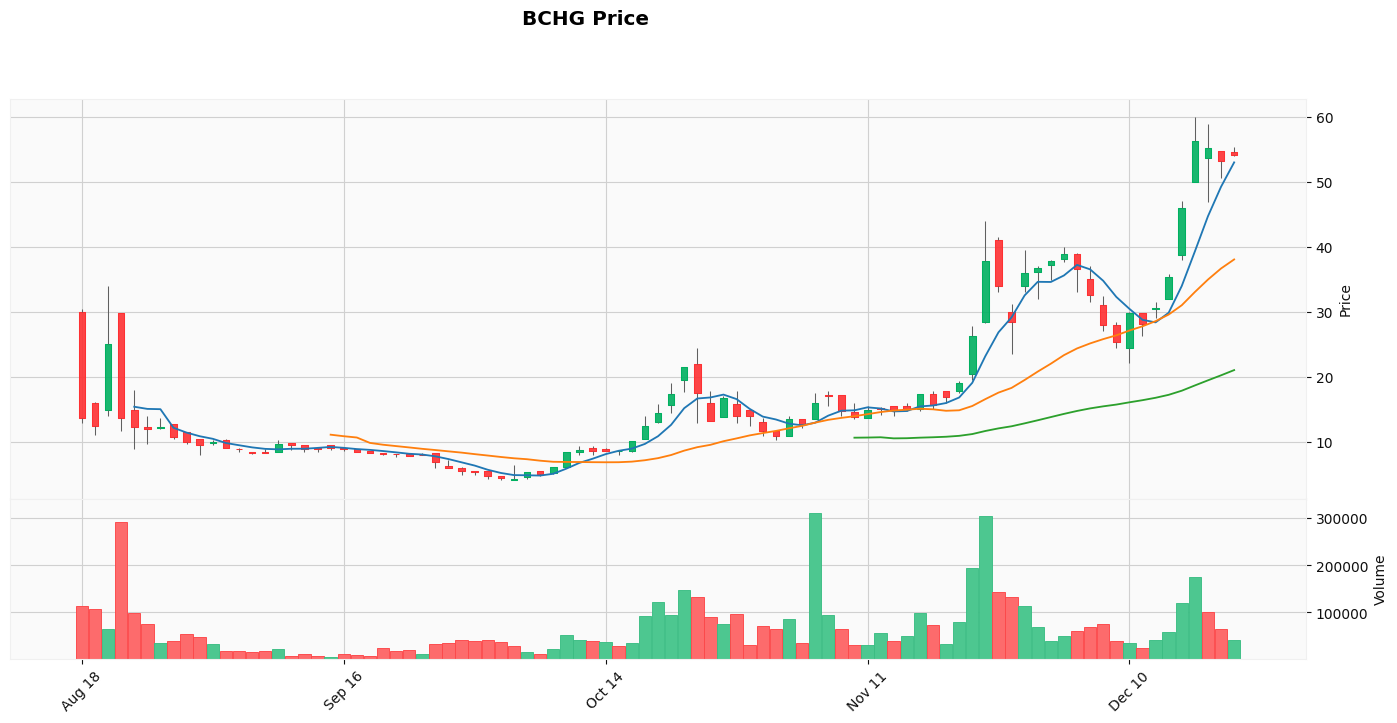

In [201]:
%matplotlib inline
draw_candlestick(bch, 'BCH Price')
draw_candlestick(bchg, 'BCHG Price')

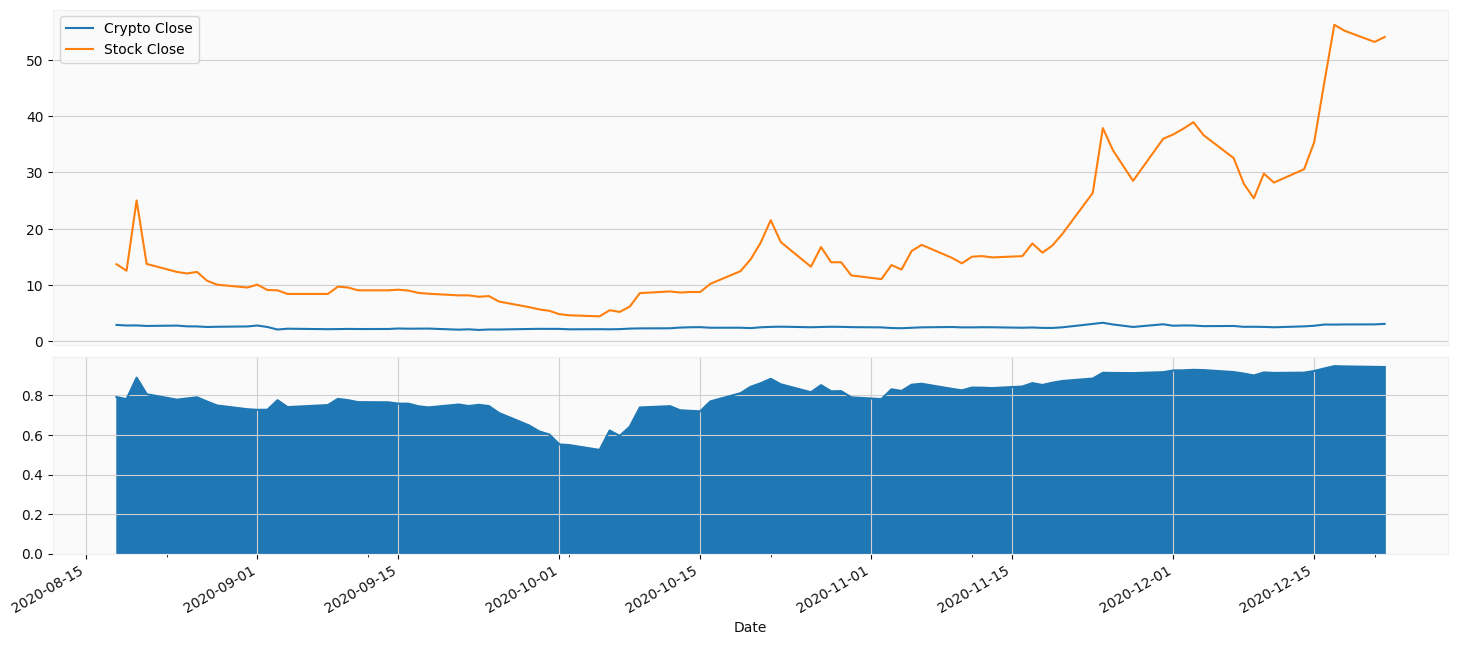

In [245]:
draw_premium_with_percentage(bchg)

In [203]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', 0.89578108, period='3y')

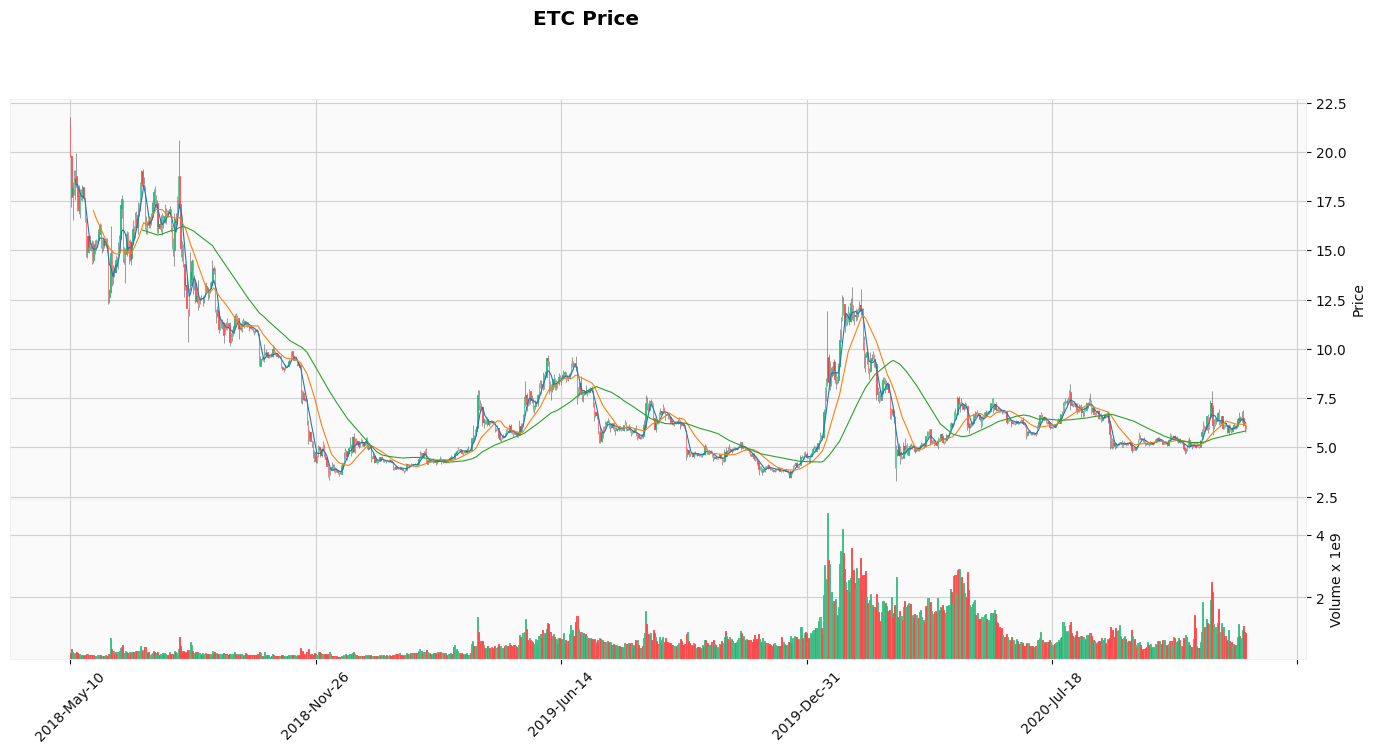

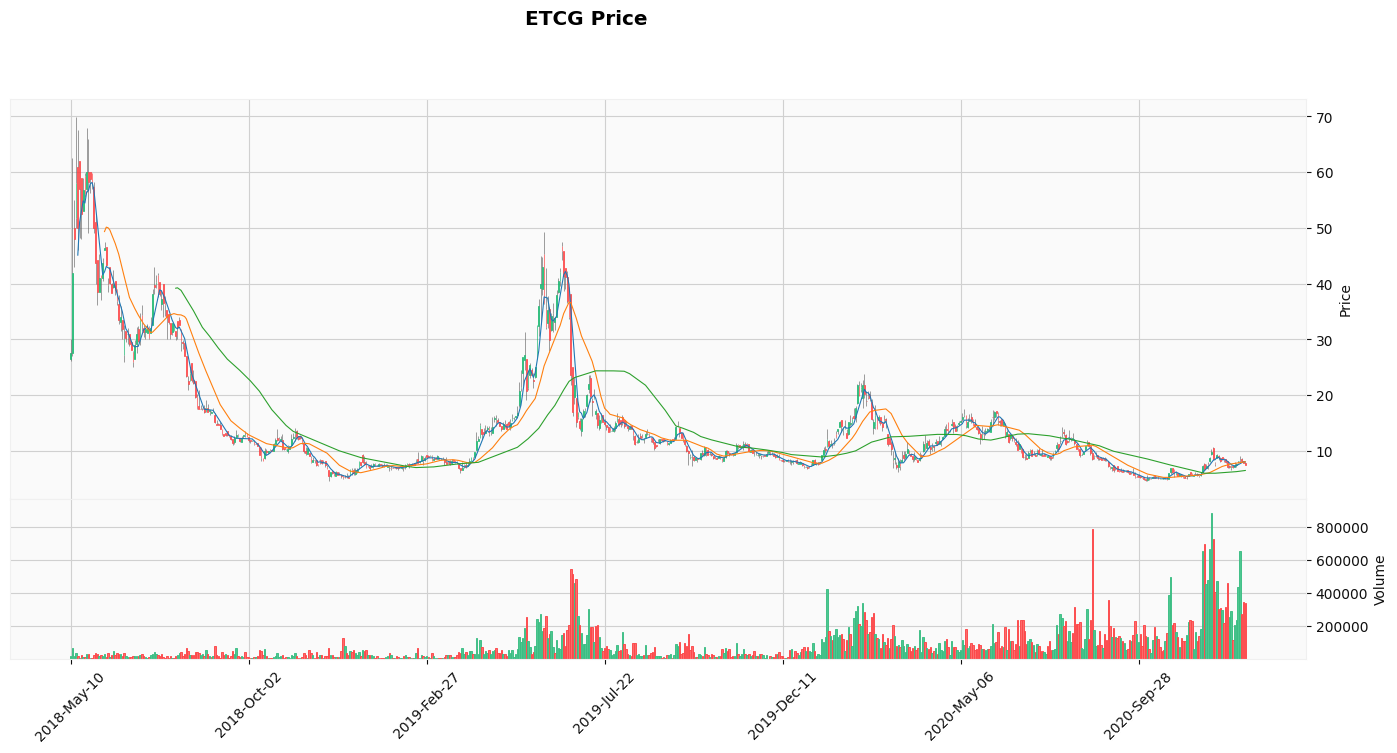

In [204]:
%matplotlib inline
draw_candlestick(etc, 'ETC Price')
draw_candlestick(etcg, 'ETCG Price')

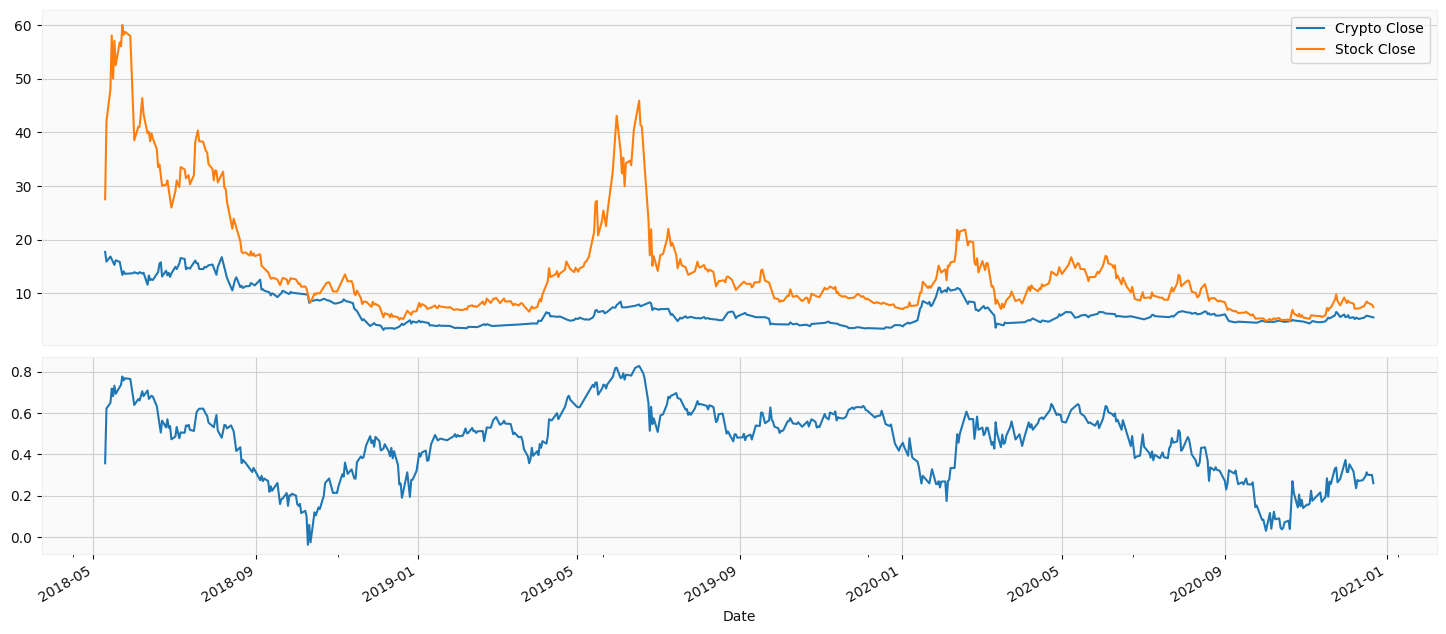

In [247]:
draw_premium_with_percentage(etcg, kind='line')

In [248]:
ltc, ltcn = get_crypto_and_stock('LTC-USD', 'LTCN', 0.09320723, period='3y')

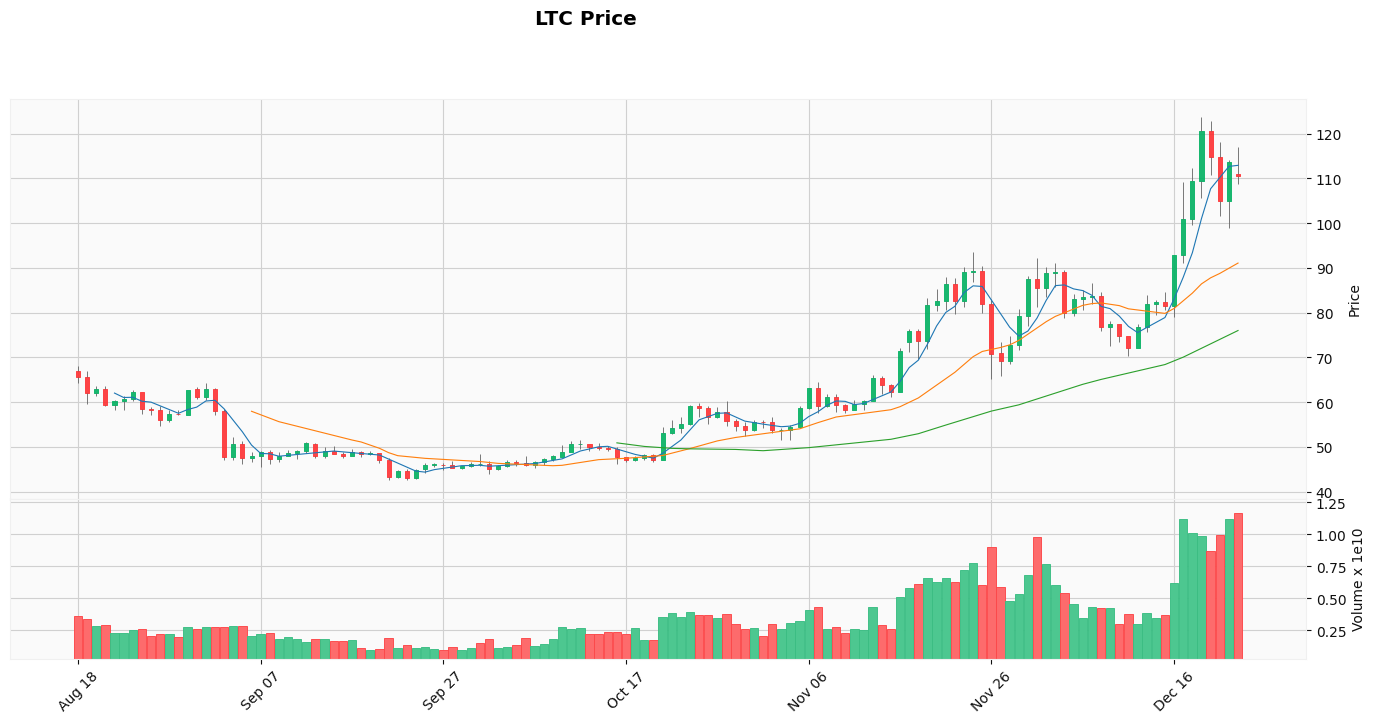

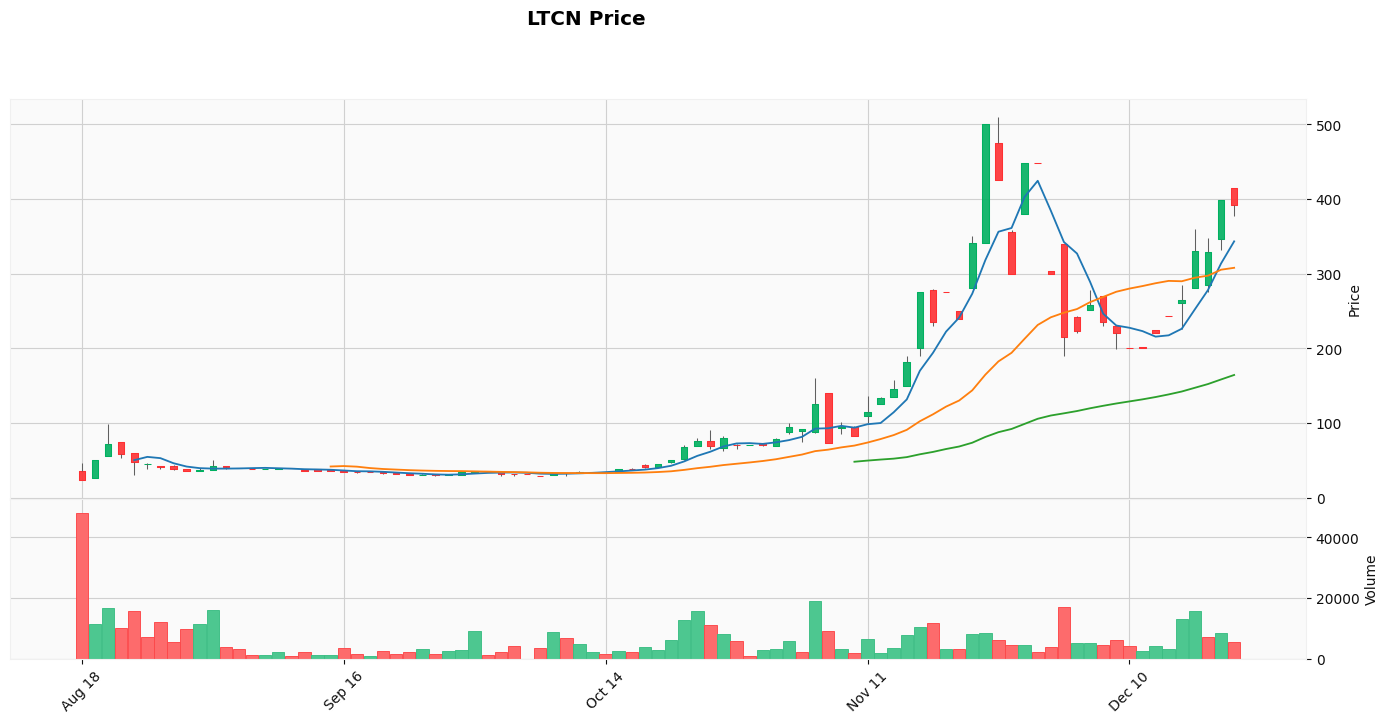

In [249]:
%matplotlib inline
draw_candlestick(ltc, 'LTC Price')
draw_candlestick(ltcn, 'LTCN Price')

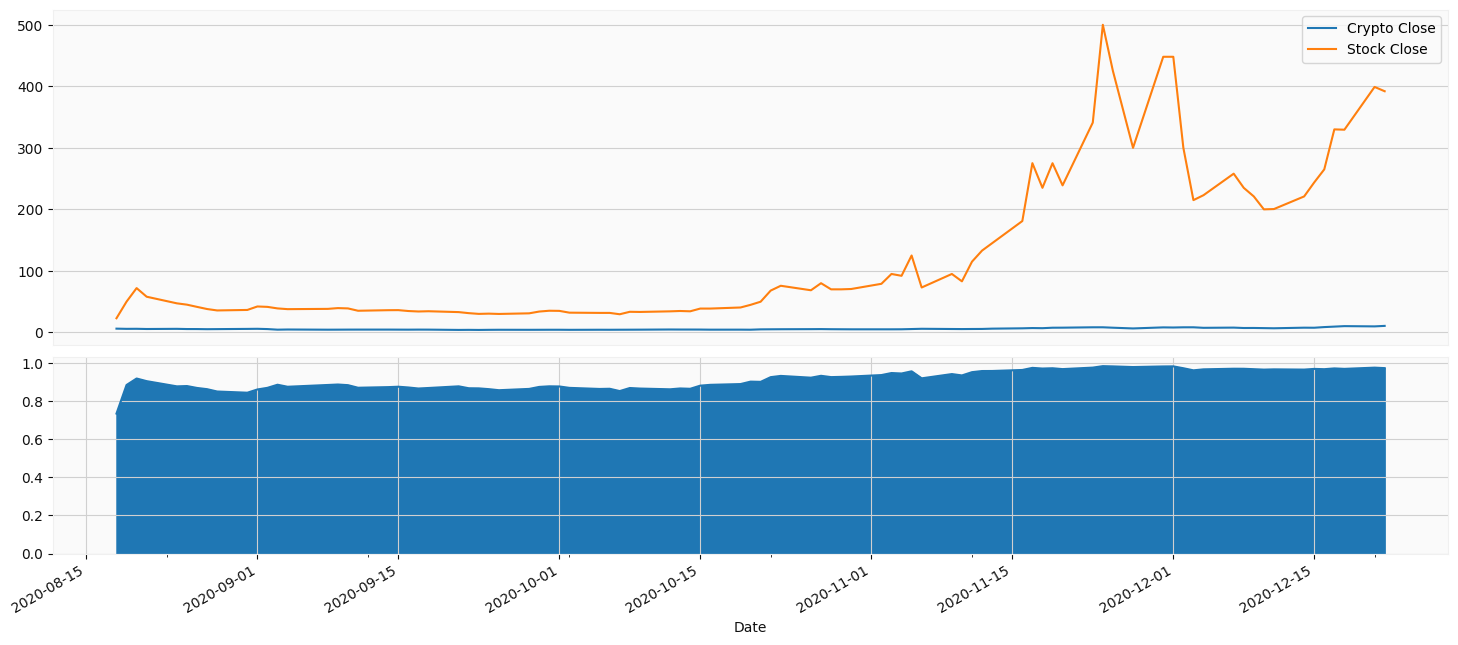

In [251]:
draw_premium_with_percentage(ltcn)

In [252]:
ltcn

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-08-18,35.000000,46.000000,23.000000,23.000000,47900.0,0.0,0.0,6.107640,0.734450
2020-08-19,26.000000,50.000000,26.000000,50.000000,11300.0,0.0,0.0,5.779280,0.884414
2020-08-20,55.000000,99.000000,55.000000,72.000000,16700.0,0.0,0.0,5.868957,0.918487
2020-08-21,75.000000,75.000000,52.430000,58.000000,10200.0,0.0,0.0,5.534554,0.904577
2020-08-24,59.950001,59.950001,29.799999,47.250000,15700.0,0.0,0.0,5.797436,0.877303
...,...,...,...,...,...,...,...,...,...
2020-12-16,260.000000,284.984985,226.029999,265.000000,13000.0,0.0,0.0,8.648670,0.967364
2020-12-17,281.019989,359.000000,280.739990,330.000000,15600.0,0.0,0.0,9.410162,0.971484
2020-12-18,284.000000,348.000000,275.100006,329.480011,7000.0,0.0,0.0,10.195427,0.969056


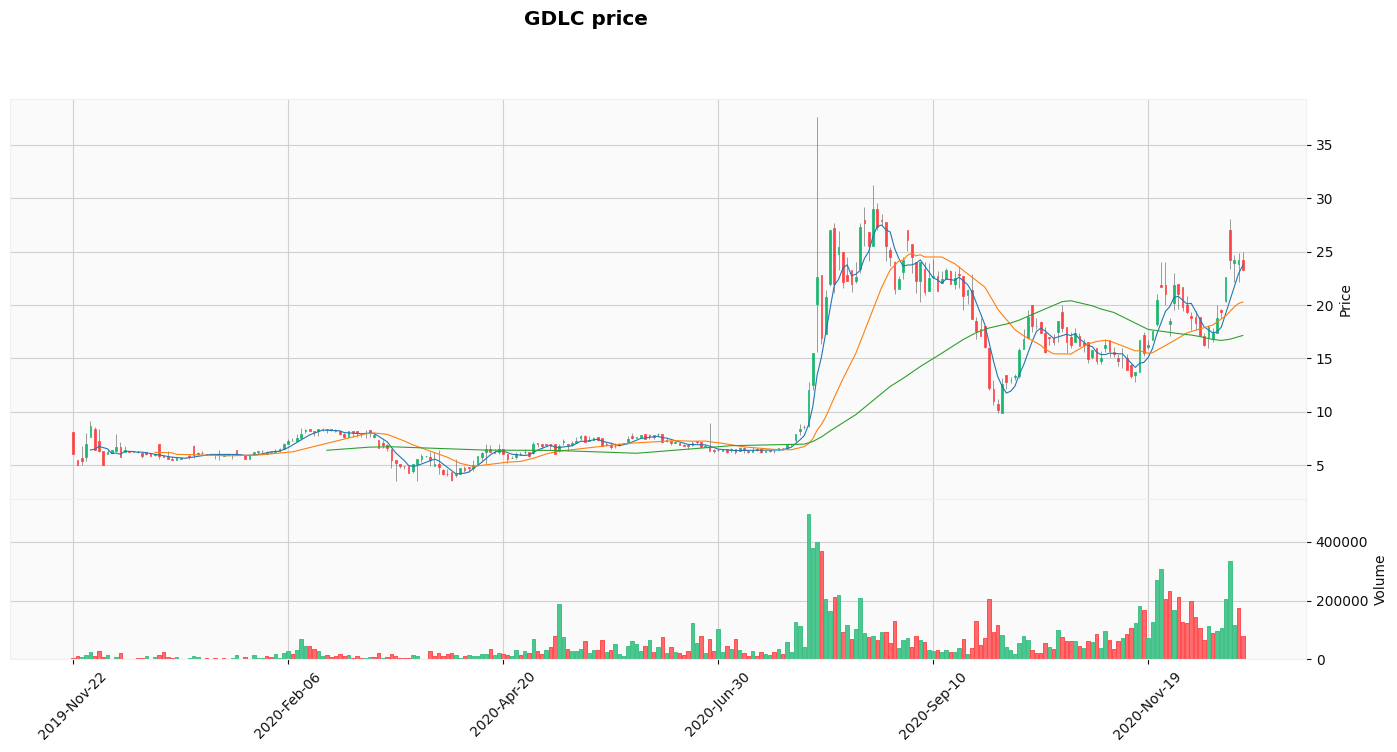

In [258]:
gdlc = get_ticker_history('GDLC')
draw_candlestick(gdlc, 'GDLC price')

In [264]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', 0.00095059, period='5y')
gbtc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2015-12-23,0.670330,0.689560,0.649560,0.659341,982800.0,0.0,0.0,0.420542,0.362178
2015-12-24,0.691209,0.691209,0.689011,0.690989,500500.0,0.0,0.0,0.432504,0.374080
2015-12-28,0.653846,0.678022,0.648352,0.648352,910000.0,0.0,0.0,0.401414,0.380870
2015-12-29,0.670110,0.687363,0.668022,0.678571,509600.0,0.0,0.0,0.411589,0.393447
2015-12-30,0.684066,0.692308,0.678571,0.692308,682500.0,0.0,0.0,0.405541,0.414219
...,...,...,...,...,...,...,...,...,...
2020-12-16,24.980000,26.040001,24.600000,25.809999,18561500.0,0.0,0.0,20.257641,0.215124
2020-12-17,29.889999,30.920000,27.100000,28.250000,28695100.0,0.0,0.0,21.678359,0.232624
2020-12-18,28.490000,29.500000,27.600000,29.480000,11082800.0,0.0,0.0,21.994714,0.253911


In [277]:
gbtc['Percent'].describe()['25%']

0.18562413427385666

In [268]:
gbtc[gbtc['Percent'] == gbtc['Percent'].min()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.8,6.9,6.41,6.495,4274800.0,0.0,0.0,6.280336,0.033051


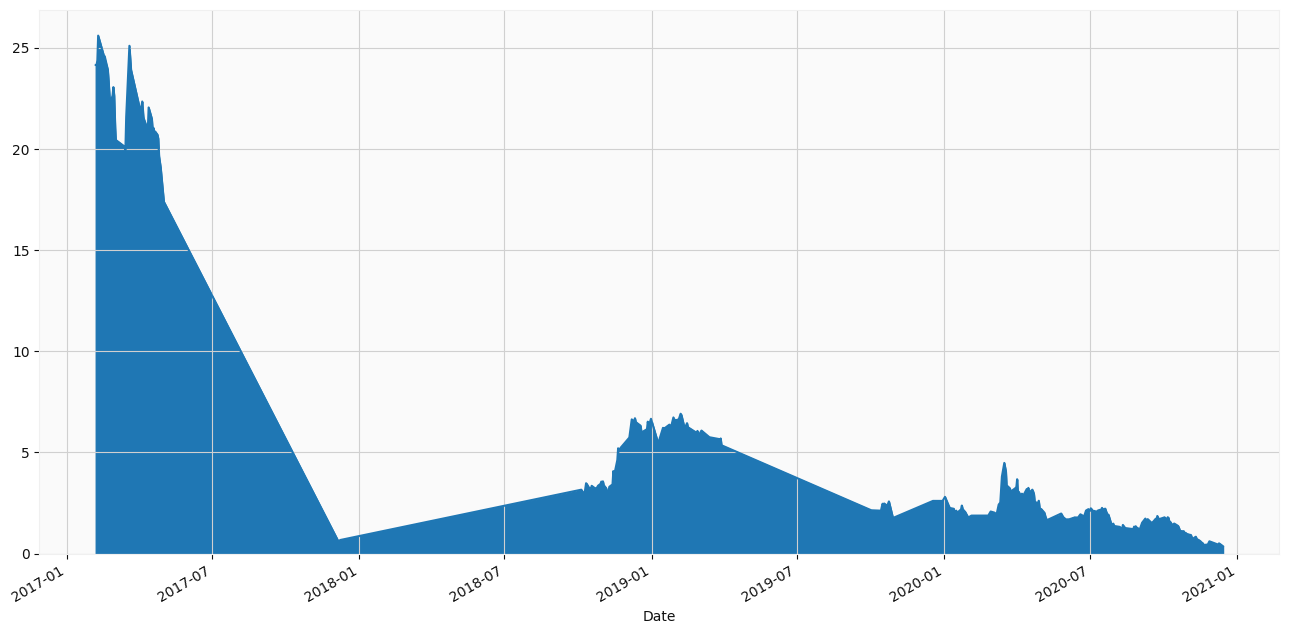

In [303]:
df = buy_at_25(gbtc, cost=10000)
df['Percent'].plot(kind='area', figsize=(16, 8))

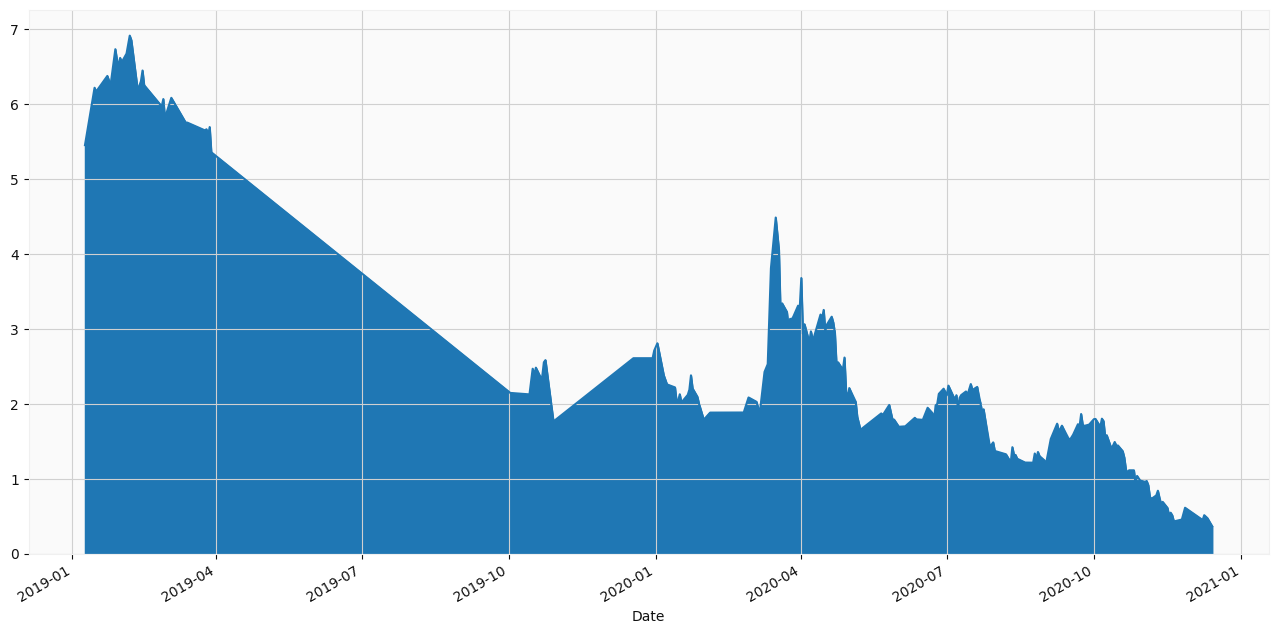

In [304]:
df.loc[df.index.year >= 2019]['Percent'].plot(kind='area', figsize=(16, 8))

In [305]:
df.loc[(df.index.year >= 2020) & (df.index.month >= 12)]

,Shares,Values,Percent
Date,,,
2020-12-08,477.099257,14499.046144,0.449905
2020-12-09,498.256111,15142.002916,0.514200
2020-12-11,485.201344,14745.268554,0.474527
2020-12-14,449.034566,13646.160200,0.364616
